In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

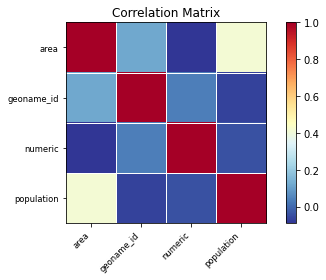

In [3]:
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep=";")
print(df.head(5))

print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

df.info()

df.describe()

corr = df.set_index('alpha_3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460
     country  year  population
1416   Spain  1952    28549870
1417   Spain  1957    29841614
1418   Spain  1962    31158061
1419   Spain  1967    32850275
1420   Spain  1972    34513161


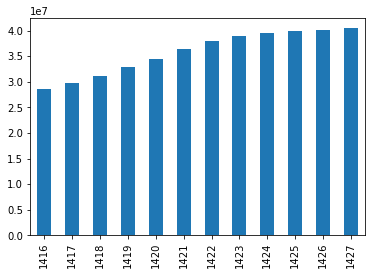

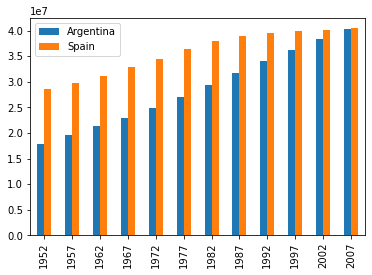

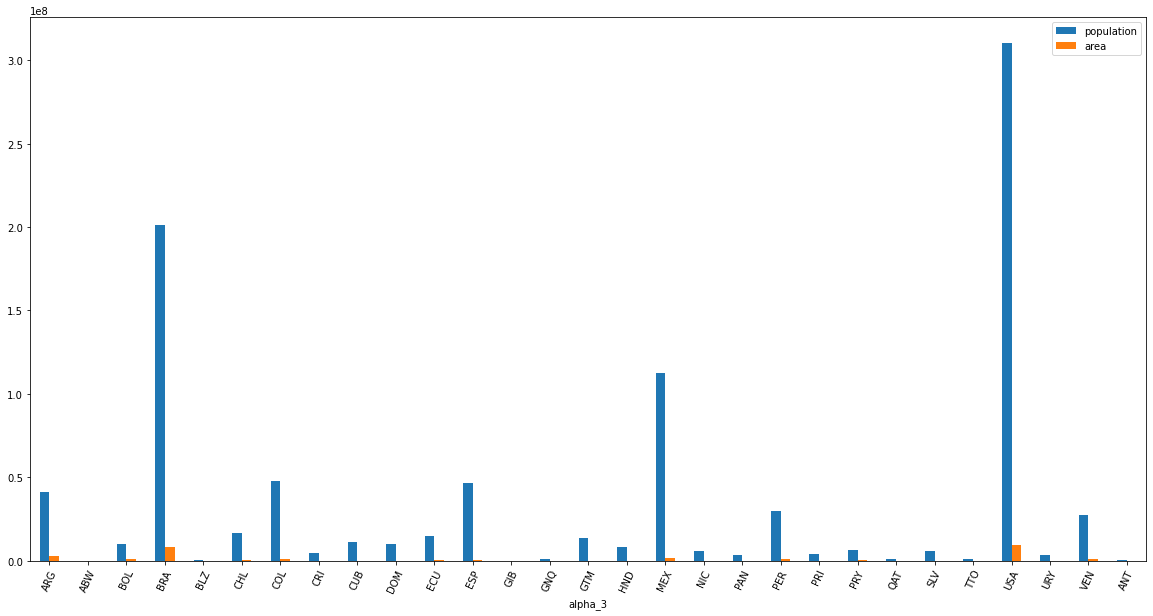

In [4]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pop = pd.read_csv(url)
print(df_pop.head(5))
df_pop_es = df_pop[df_pop["country"] == 'Spain' ]
print(df_pop_es.head())
df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

df_pop_ar = df_pop[(df_pop["country"] == 'Argentina')]

anios = df_pop_es['year'].unique()
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

df_plot = pd.DataFrame({'Argentina': pop_ar,
                    'Spain': pop_es},
                       index=anios)
df_plot.plot(kind='bar')

df_espanol = df.replace(np.nan, '', regex=True)
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
df_espanol

df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

anomalies = []




In [6]:
# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])
find_anomalies(df_pop)

1944.9693409820527
2014.0306590179473
